Figure saved to: ../results/figures\fig3_shapley_paradox.pdf


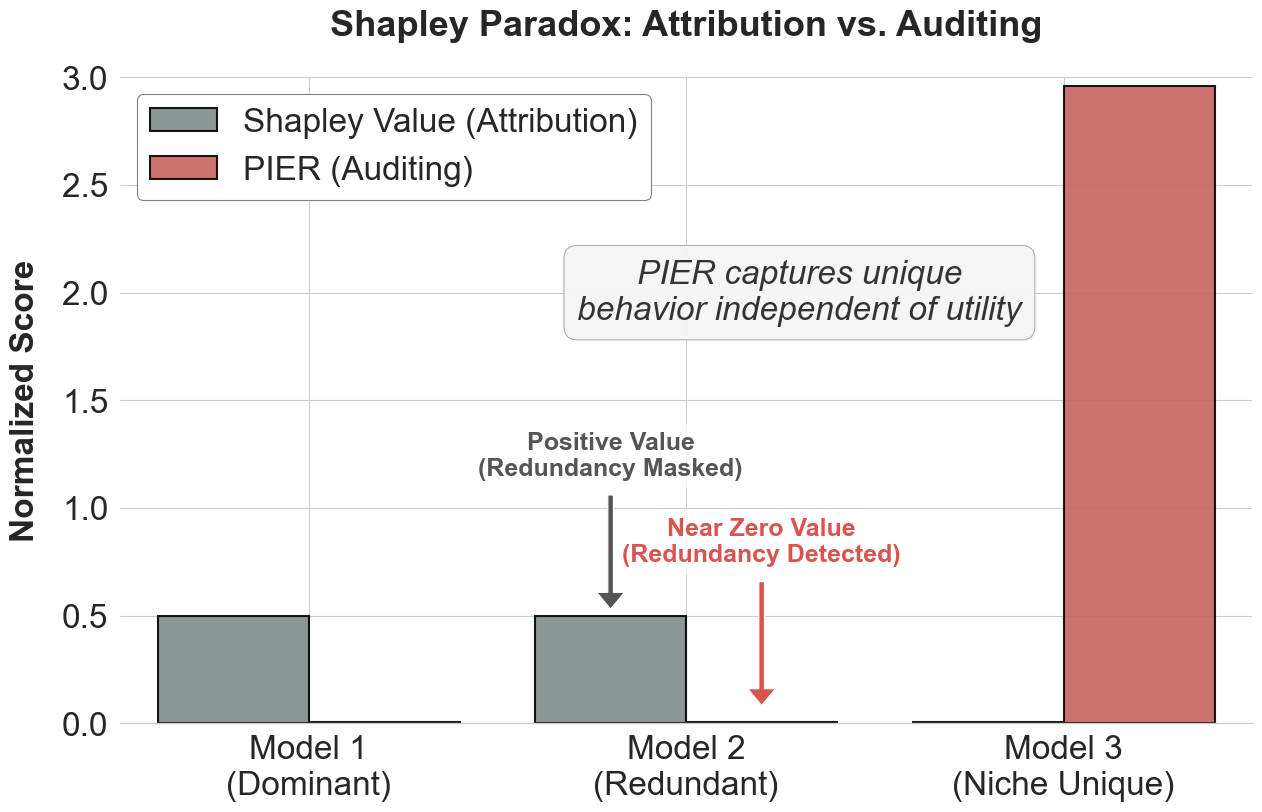

In [40]:
# %% [markdown]
# # Figure 3: The Attribution vs. Auditing Paradox (Final Layout)
# 
# **Updates:**
# * **Annotation Logic:** Updated Model C text to emphasize that agreement on unique models highlights the divergence on redundant ones.
# * **Positioning:** Moved text higher (y=1.48) and added a background box to prevent overlapping with bars.
# * **Arrows:** Adjusted arrow pointers for Model B to be distinct and clear.

# %%
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os

# %%
# Load Data
DATA_PATH = "../results/tables/exp3_shapley.csv"
FIG_PATH = "../results/figures"
os.makedirs(FIG_PATH, exist_ok=True)

if not os.path.exists(DATA_PATH):
    raise FileNotFoundError("Data file not found. Run experiments/exp3_shapley.py first.")

df = pd.read_csv(DATA_PATH)

# %%
# Configure Nature-Style Aesthetics (Large Fonts)
sns.set_context("paper", font_scale=2.0) 
sns.set_style("whitegrid")

PALETTE = {
    "Shapley Value (Attribution)": "#7F8C8D", # Slate Gray
    "PIER (Auditing)": "#D9534F"              # Nature Red
}

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial', 'Helvetica', 'DejaVu Sans']

# %%
plt.figure(figsize=(13, 8.5)) # Increased width slightly for better spacing

# Main Plot
ax = sns.barplot(
    data=df,
    x="Model",
    y="Score",
    hue="Metric",
    palette=PALETTE,
    edgecolor="black",
    linewidth=1.5,
    alpha=0.9
)

# --- Labels ---
ax.set_xlabel("", fontsize=24) 
ax.set_ylabel("Normalized Score", fontsize=24, fontweight='bold', labelpad=15)
ax.set_title("Shapley Paradox: Attribution vs. Auditing", fontsize=26, pad=30, fontweight='bold')

# --- Axis & Grid ---
ax.tick_params(axis='x', labelsize=24)
ax.tick_params(axis='y', labelsize=24)
# Extend Y-axis to make room for top annotations
ax.set_ylim(0, 3.0) 
ax.grid(axis='x') 
sns.despine(left=True)

# --- Legend ---
# Clean legend with border
ax.legend(
    title="", 
    frameon=True, 
    fontsize=24, 
    loc="upper left", 
    facecolor='white', 
    edgecolor='gray',
    framealpha=1.0
)

# --- Critical Annotations (Optimized Layout) ---

# 1. The Trap (Model B - Shapley)
# Pointing to the top of the Gray Bar (~0.21)
ax.annotate('Positive Value\n(Redundancy Masked)', 
            xy=(0.8, 0.5),           # Tip of arrow
            xytext=(0.8, 1.15),      # Text position (moved slightly right)
            arrowprops=dict(facecolor='#555555', shrink=0.05, width=4, headwidth=20),
            fontsize=18, color='#555555', fontweight='bold', ha='center',
            bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="none", alpha=0.8))

# 2. The Solution (Model B - PIER)
# Pointing to the bottom Red Bar (~0.02)
ax.annotate('Near Zero Value\n(Redundancy Detected)', 
            xy=(1.2, 0.05),           # Tip of arrow
            xytext=(1.2, 0.75),      # Text position
            arrowprops=dict(facecolor='#D9534F', shrink=0.05, width=4, headwidth=20),
            fontsize=18, color='#D9534F', fontweight='bold', ha='center',
            bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="none", alpha=0.8))

# 3. The Logic Bridge (Model C)
# High text position with background box to prevent overlap with the tall red bar
ax.text(1.3, 2.0, 
        "PIER captures unique\nbehavior independent of utility", 
        ha='center', va='center', fontsize=24, style='italic', color='#333333',
        bbox=dict(boxstyle="round,pad=0.4", fc="#F5F5F5", ec="#AAAAAA", alpha=0.95))

plt.tight_layout()

# %%
# Save
save_path = os.path.join(FIG_PATH, "fig3_shapley_paradox.pdf")
plt.savefig(save_path, format="pdf", dpi=300, bbox_inches="tight")
print(f"Figure saved to: {save_path}")
plt.show()